In [ ]:
library(ggplot2)
library(dplyr)
library(data.table)
library(ggfortify)
library(viridis)


Warning message:
“package ‘viridis’ was built under R version 4.3.3”
Loading required package: viridisLite



In [ ]:
set.seed(2022)

# Get expression file --------------------------------
expr=fread(paste0("~/cd4_QTL_analysis/02_Gene_expression/analysis/002_GetPseudobulk_whole/all_cells_mean_mx.txt"),header=T)
expr=as.data.frame(expr)

dim(expr)
gene=read.table(paste0("~/cd4_QTL_analysis/02_Gene_expression/analysis/002_GetPseudobulk_whole/all_cells_gene_list.txt"),header=T)
expr=as.data.frame(t(expr))
colnames(expr)=gene$gene
dim(expr)

# Remove individuals with NA
expr <- mutate_all(expr, function(x) as.numeric(as.character(x)))
na_idx=which(is.na(rowMeans((expr))))
if(length(na_idx) > 0){
  expr = expr[-na_idx,]
}

# Remove genes with NA
na_idx=which((colSums((expr))==0))
if(length(na_idx) > 0){
  expr = expr[,-na_idx]
}

dim(expr)

expr[1:5,1:5]
rnames=rownames(expr)
cnames=colnames(expr)

[1] 27541   364

[1]   364 27541

[1]   364 27541

,ENSG00000238009,ENSG00000268903,ENSG00000241860,ENSG00000228463,ENSG00000290385
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10004,0.0000000000,0.0000000000,0.003311258,0.002207506,0.005518764
10005,0.0009569378,0.0009569378,0.004784689,0.005741627,0.001913876
10006,0.0006357279,0.0000000000,0.009535919,0.003178640,0.006993007
10007,0.0000000000,0.0000000000,0.002982107,0.006958250,0.003976143
10008,0.0000000000,0.0009250694,0.006475486,0.002775208,0.001850139


In [ ]:
source("~/cd4_QTL_analysis/02_Gene_expression//NormalizePseudobulk.R")

# Transform and scale the matrix
expr2 <- pseudobulk_scaling(expr=expr,pi0=0.9,log1p=T,scale=T,RINT=F,HVG=F)

print("Start the PCA estimation...")
print(Sys.time())
tick1 = Sys.time()

### check finite values ####
expr2[1:5,1:5]
dim(expr2)
table(is.na(expr2))
na_idx=which(is.na(colMeans((expr2))))
if(length(na_idx) > 0){
  expr2 = expr2[,-na_idx]
}
dim(expr2)

Transforming the pseudo-bulk expression matrix...

The input matrix has 364 rows and 27541 cols

The settings are:
pi0 = 0.9
log1p = TRUE
scale = TRUE
RINT = FALSE
HVG = FALSE

Excluded 3946 genes with pi0 >= 0.9

Use all 23595 remaining genes

Use log(x+1) transformation

Standardize the matrix column-wise (scale and center)

Transformation and scaling completed!



[1] "Start the PCA estimation..."
[1] "2024-08-03 15:24:16 EDT"


,ENSG00000238009,ENSG00000268903,ENSG00000241860,ENSG00000228463,ENSG00000290385
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10004,-0.85832011,-1.1453655,-1.02129142,-1.0007462,0.8962974
10005,0.32947367,-0.6588800,-0.57072382,0.1646344,-0.8723635
10006,-0.06909968,-1.1453655,0.87769062,-0.6801047,1.6177771
10007,-0.85832011,-1.1453655,-1.12203451,0.5648701,0.1402211
10008,-0.85832011,-0.6750737,-0.05450023,-0.8132688,-0.9036918


[1]   364 23595


  FALSE 
8588580 

[1]   364 23595

In [ ]:
prcompResult<- prcomp(expr2, center = F, scale = F) #This should take less than a minute.


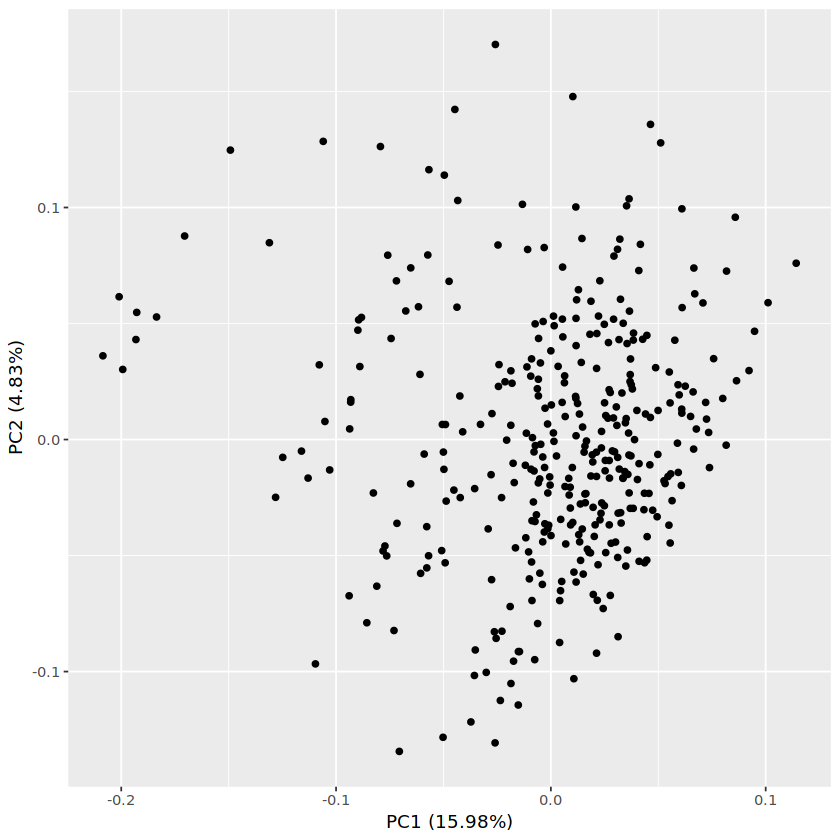

In [ ]:
autoplot(prcompResult)

In [ ]:
meta <-read.csv("~//metadata_harmonizing//results//post_WGS_QC//version_080923//revision_103023//cd4_scRNAseq_meta.v3.csv")

In [ ]:
meta$WGS_sampleID

[1] 20168 40327 40366 10076 10006 10003 10005 10008 10010 10013 10014 10015
 [13] 10016 10019 10028 10031 10032 10033 10034 10035 10037 10043 10046 10047
 [25] 10048 10049 10051 10054 10055 10057 10062 10064 10065 10067 10072 10073
 [37] 10077 10081 10085 10087 10088 10093 10094 20112 20116 20118 20119 20122
 [49] 20124 20125 20128 20129 20133 20135 20139 20142 20143 20144 20145 20149
 [61] 20150 20151 20153 20154 20158 20159    NA 20164 20173 20175 20176 20179
 [73] 20186 20187 20189 20190 30194 30198 30199 30200 30202 30203 30205 30207
 [85] 30210 30212 30214 30215 30216 30221 30222 30226 30227 30230 30231 30241
 [97] 30243 30247 30250 30254 30255 30258 30259 30260 30261 30262 30263 30268
[109] 30269 30272 30273 30275 30280 30285 30286 40290 40291 40294 40296 40298
[121] 40300 40302 40306 40309 40310 40312 40315 40316 40317 40318 40322 40325
[133] 40326 40330 40331 40332 40334 40336 40338 40339 40342 40347 40353 40354
[145] 40358 40359 40361 40362 40364 40365 40370 40371 40374 40375 40377 40378
[157] 40379 40382 50389 50390 50391 50394 50395 50396 50399 50403 50405 50406
[169] 50407 50408 50410 50413 50415 50419 50420 50421 50424 50426 50429 50430
[181] 50433 50449 50451 50452 50454 50456 50461 50469 50471 50472 50474 50478
[193] 20099 20100    NA 20102 50386 50387 50444 10004 10006 10007 10011 10012
[205] 10018 10020 10021 10022 10023 10026 10027 10029 10030 10036 10038 10040
[217] 10041 10042 10044 10052 10053 10056 10059 10061 10063 10068 10069 10071
[229] 10074 10075 10076 10078 10079 10080 10083 10084 10086 10089 10091 10092
[241] 20106 20107 20109 20114 20115 20117 20120 20127 20131 20132 20134 20138
[253] 20140 20141 20146 20147 20148 20155 20157 20160 20165 20166 20167 20169
[265] 20171 20172 20178 20180 20181 20182 20183 20184 20185 20188 30195 30196
[277] 30197 30204 30206 30211 30218 30219 30224 30225 30228 30229 30232 30233
[289] 30234 30235 30236 30237 30239 30242 30244 20168 30246 30248 30249 30256
[301] 30257 30265 30266 30267 30270 30271 30274 30276 30277 30281 30282 30283
[313] 30284 40292 40293 40295 40299 40303 40304 40307 40311 40319 40321 40323
[325] 40324 40328 40329 40337 40340 40341 40343 40344 40345 40346 40348 40350
[337] 40351 40355 40356 40360 40363 40366 40367 40368 40369 40373 40376 40380
[349] 40381 50392 50397 50398 50402 50411 50412 50414 50416 50417 50418 50422
[361] 50423 50425 50427 50428 50431 50432 50450 50453 50457 50458 50460 50462
[373] 20163 50464 50466 50468 50473 50477 20103 20104 20105 50434 50435 50437
[385] 50439 50440 50441 50443 50447 10002 10070 10045 50463 40335 40349    NA
[397] 10045    NA 20161    NA    NA    NA    NA    NA    NA    NA    NA 20101

In [ ]:
pca_loadings <- prcompResult$x

In [ ]:
meta_filtered <- meta %>%
  filter(WGS_sampleID %in% rownames(pca_loadings)) %>%
  distinct(WGS_sampleID, .keep_all = TRUE)

dim(meta_filtered)

[1] 364  48

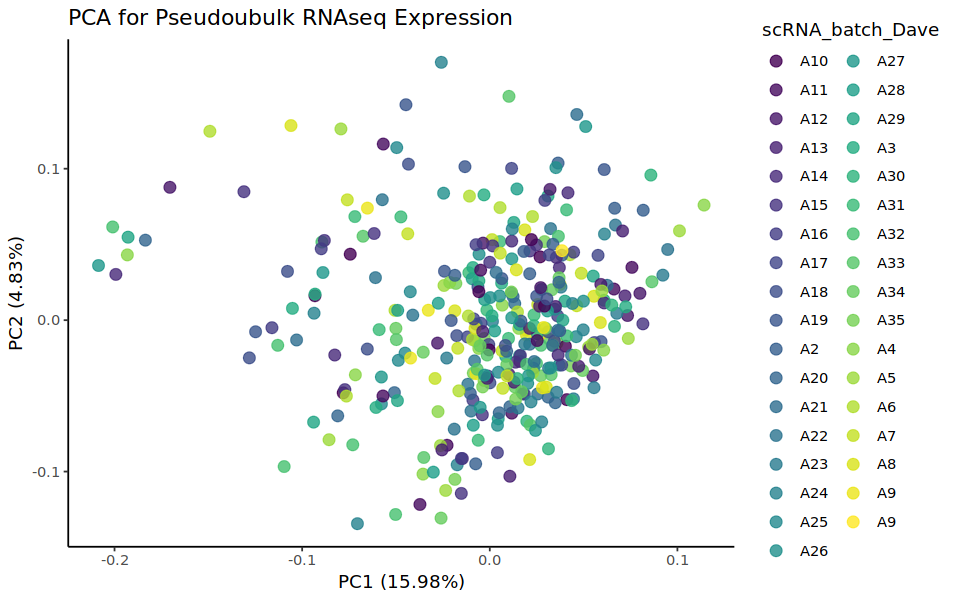

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 5, res=150)
autoplot(prcompResult, data = meta_filtered, colour = 'scRNA_batch_Dave', size=3) + theme_classic() +
ggtitle("PCA for Pseudoubulk RNAseq Expression") +
scale_color_viridis(discrete=TRUE, alpha=0.8) 
ggsave("pseudobulk_all_cells_pca.png", height=5, width=8, dpi=300)